# Task 0



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

# Path to your Google Drive folder containing images
drive_folder_path = '/content/drive/MyDrive/Deep Learning/Image_set'

# List to store image paths and corresponding output labels
image_paths = []
output_labels = []

# Traverse the Google Drive folder and collect image paths and assign output labels
for foldername, subfolders, filenames in os.walk(drive_folder_path):
    for filename in filenames:
        # Check if the file is an image (you can add more extensions if necessary)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_path = os.path.join(foldername, filename)
            image_paths.append(image_path)
            # Check for keywords in the filename and assign output labels accordingly
            if 'hamza' in filename.lower():
                output_labels.append('Hamza Ahmad')
            elif 'subhan' in filename.lower():
                output_labels.append('Subhan Wasif')
            else:
                output_labels.append('Unknown')

# Create a DataFrame from image paths and corresponding output labels
df = pd.DataFrame({'Image Path': image_paths, 'Output': output_labels})

# Print the DataFrame
print(df)


                                            Image Path        Output
0    /content/drive/MyDrive/Deep Learning/Image_set...       Unknown
1    /content/drive/MyDrive/Deep Learning/Image_set...       Unknown
2    /content/drive/MyDrive/Deep Learning/Image_set...       Unknown
3    /content/drive/MyDrive/Deep Learning/Image_set...       Unknown
4    /content/drive/MyDrive/Deep Learning/Image_set...       Unknown
..                                                 ...           ...
145  /content/drive/MyDrive/Deep Learning/Image_set...  Subhan Wasif
146  /content/drive/MyDrive/Deep Learning/Image_set...  Subhan Wasif
147  /content/drive/MyDrive/Deep Learning/Image_set...  Subhan Wasif
148  /content/drive/MyDrive/Deep Learning/Image_set...  Subhan Wasif
149  /content/drive/MyDrive/Deep Learning/Image_set...  Subhan Wasif

[150 rows x 2 columns]


In [3]:
# Save the DataFrame as a CSV file
csv_filename = '/content/drive/MyDrive/output_data.csv'  # Specify the desired CSV file path
df.to_csv(csv_filename, index=False)

# Print a message indicating the CSV file has been saved
print(f"CSV file '{csv_filename}' has been saved.")


CSV file '/content/drive/MyDrive/output_data.csv' has been saved.


# Task 1

In [12]:
import cv2
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

# Path to the CSV file containing image paths and labels
csv_file_path = '/content/drive/MyDrive/output_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Extract image paths and labels from the DataFrame
image_paths = df['Image Path'].tolist()
labels = df['Output'].tolist()

# Lists to store resized images and corresponding labels
resized_images = []
resized_labels = []

# Resize images to 220x220 resolution using OpenCV
for image_path, label in zip(image_paths, labels):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image to 220x220 resolution
    resized_image = cv2.resize(image, (220, 220))
    resized_image = resized_image.astype('float32') / 255.0
    # Append resized image and corresponding label to lists
    resized_images.append(resized_image)
    resized_labels.append(label)

# Stratified split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, resized_labels, test_size=0.2, random_state=42, stratify=resized_labels)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Save train and test splits as pickle objects
output_pickle_path = '/content/drive/MyDrive/train_test_data.pkl'

with open(output_pickle_path, 'wb') as pickle_file:
    pickle.dump((X_train, X_test, y_train, y_test), pickle_file)

# Print a message indicating the pickle file has been saved
print(f"Train and test splits saved as '{output_pickle_path}'")


Train and test splits saved as '/content/drive/MyDrive/train_test_data.pkl'


In [13]:
y_train

array(['Hamza Ahmad', 'Unknown', 'Subhan Wasif', 'Hamza Ahmad',
       'Subhan Wasif', 'Unknown', 'Subhan Wasif', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Subhan Wasif', 'Subhan Wasif',
       'Subhan Wasif', 'Subhan Wasif', 'Hamza Ahmad', 'Hamza Ahmad',
       'Unknown', 'Unknown', 'Hamza Ahmad', 'Subhan Wasif', 'Hamza Ahmad',
       'Unknown', 'Hamza Ahmad', 'Subhan Wasif', 'Unknown', 'Unknown',
       'Hamza Ahmad', 'Unknown', 'Hamza Ahmad', 'Hamza Ahmad',
       'Subhan Wasif', 'Subhan Wasif', 'Hamza Ahmad', 'Unknown',
       'Unknown', 'Hamza Ahmad', 'Subhan Wasif', 'Unknown',
       'Subhan Wasif', 'Hamza Ahmad', 'Subhan Wasif', 'Hamza Ahmad',
       'Unknown', 'Hamza Ahmad', 'Hamza Ahmad', 'Unknown', 'Hamza Ahmad',
       'Hamza Ahmad', 'Hamza Ahmad', 'Hamza Ahmad', 'Subhan Wasif',
       'Unknown', 'Subhan Wasif', 'Hamza Ahmad', 'Unknown',
       'Subhan Wasif', 'Unknown', 'Hamza Ahmad', 'Unknown', 'Hamza Ahmad',
       'Subhan Wasif', 'Unknown', 'Hamza Ahmad', 'Subh

# Task 2

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a deep neural network for multi-class classification
model = models.Sequential()

# Flatten the input layer
model.add(layers.Flatten(input_shape=(220, 220, 3)))  # Assuming input images are resized to 220x220 resolution

# Add hidden layers with ReLU activation function
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer with appropriate number of output neurons (for example, 3 classes: 'Hamza', 'Subhan', 'Unknown')
num_classes = 3
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Appropriate loss function for multi-class classification
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 145200)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               18585728  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 18594179 (70.93 MB)
Trainable params: 18594179 (70.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


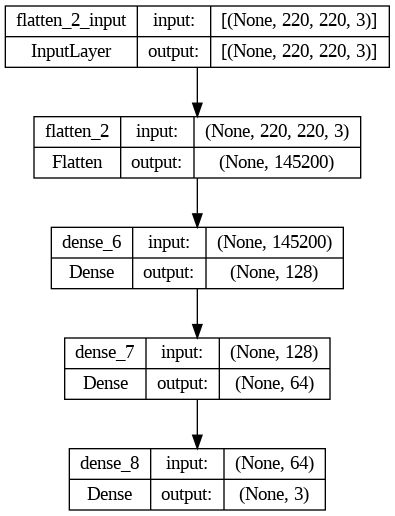

In [21]:
from keras.utils import plot_model
plot_model(model, "demo_model.png", show_shapes=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode class labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [17]:
# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
4/4 [==============================] - 3s 138ms/step - loss: 43.8284 - accuracy: 0.4000 - val_loss: 39.3340 - val_accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 19.7458 - accuracy: 0.4833 - val_loss: 11.0257 - val_accuracy: 0.5333
Epoch 3/10
4/4 [==============================] - 0s 30ms/step - loss: 8.7214 - accuracy: 0.5917 - val_loss: 2.6148 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 27ms/step - loss: 3.4348 - accuracy: 0.7000 - val_loss: 2.4230 - val_accuracy: 0.8333
Epoch 5/10
4/4 [==============================] - 0s 28ms/step - loss: 3.4798 - accuracy: 0.7917 - val_loss: 1.6365 - val_accuracy: 0.8000
Epoch 6/10
4/4 [==============================] - 0s 29ms/step - loss: 1.2277 - accuracy: 0.8833 - val_loss: 6.5624 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 0s 30ms/step - loss: 0.4805 - accuracy: 0.9167 - val_loss: 1.6615 - val_accuracy: 0.7667
Epoch 8/10
4/4 [======

# Task 3

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = models.Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(220, 220, 3)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(3, activation='softmax'))  # 3 output neurons for 'Hamza', 'Subhan', and 'Unknown'

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)


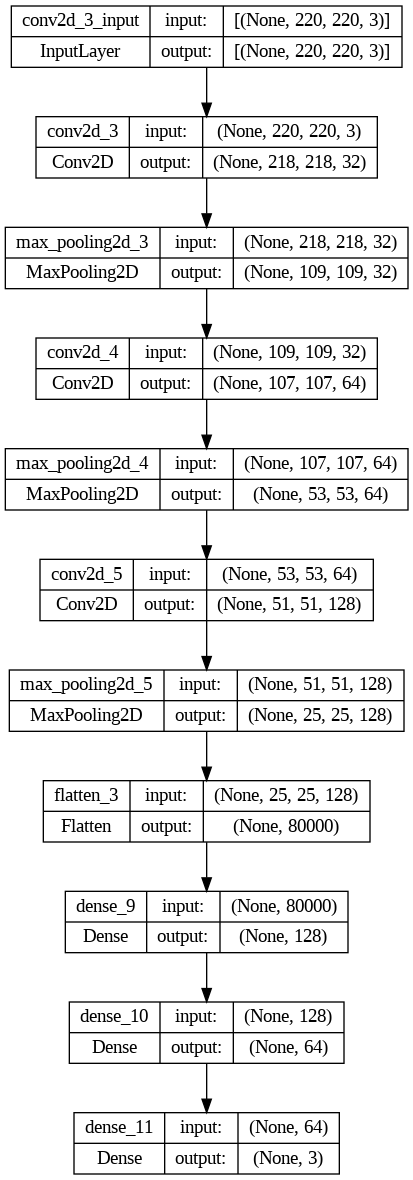

In [23]:
plot_model(model2, "demo_model2.png", show_shapes=True)

In [26]:
# Train the model with callbacks and validation split
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/10
4/4 [==============================] - 1s 212ms/step - loss: 9.7157e-06 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9167
Epoch 2/10
4/4 [==============================] - 0s 25ms/step - loss: 1.1069e-05 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 0.9167
Epoch 3/10
4/4 [==============================] - 0s 23ms/step - loss: 1.2465e-05 - accuracy: 1.0000 - val_loss: 0.1727 - val_accuracy: 0.9167
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 1.2697e-05 - accuracy: 1.0000 - val_loss: 0.1746 - val_accuracy: 0.9167
Epoch 5/10
4/4 [==============================] - 0s 23ms/step - loss: 1.2861e-05 - accuracy: 1.0000 - val_loss: 0.1749 - val_accuracy: 0.9167
Epoch 6/10
4/4 [==============================] - 0s 23ms/step - loss: 1.2800e-05 - accuracy: 1.0000 - val_loss: 0.1741 - val_accuracy: 0.9167
Epoch 7/10
4/4 [==============================] - 0s 24ms/step - loss: 1.2561e-05 - accuracy: 1.0000 - val_loss: 0.1727 - val_accuracy: 0.916

# Deployment

Deployment was carried out using Jupyter Notebooks because of the extensive workaround of accessing your local webcam via Google Colab.